In [1]:

import pandas as pd

# Load the dataset
fraud_data = pd.read_csv('/content/Fraud_check.csv')




In [2]:
# Display the first few rows of the dataframe
print(fraud_data.head())

  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO  


In [3]:
# Summary statistics
print(fraud_data.describe())

       Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000


In [4]:

# Check for any missing values
print(fraud_data.isnull().sum())

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64


In [5]:
# Convert 'Taxable.Income' into a categorical variable
fraud_data['Income_Category'] = pd.cut(fraud_data['Taxable.Income'], bins=[0, 30000, float('inf')], labels=['Risky', 'Good'])

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
fraud_data['Undergrad'] = label_encoder.fit_transform(fraud_data['Undergrad'])
fraud_data['Marital.Status'] = label_encoder.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban'] = label_encoder.fit_transform(fraud_data['Urban'])

# Split data into features (X) and target variable (y)
X = fraud_data.drop(columns=['Taxable.Income', 'Income_Category'])
y = fraud_data['Income_Category']


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [10]:
X_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
145,0,0,197422,2,1
9,1,0,155482,4,1
375,0,1,130935,2,0
523,0,0,42198,12,0
188,0,0,137569,10,0
...,...,...,...,...,...
71,0,2,105680,22,0
106,1,2,58535,20,1
270,0,1,130680,5,0
435,0,0,111774,4,1


In [11]:
y_train

145     Good
9       Good
375     Good
523     Good
188    Risky
       ...  
71      Good
106    Risky
270     Good
435     Good
102     Good
Name: Income_Category, Length: 480, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [7]:
# Train a decision tree classifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the testing data
y_pred = model.predict(X_test)

y_pred


array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
    

In [16]:
import pandas as pd
pd.Series(y_pred).value_counts()

Good     118
Risky      2
dtype: int64

In [17]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7666666666666667
Classification Report:
               precision    recall  f1-score   support

        Good       0.78      0.98      0.87        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.77       120
   macro avg       0.39      0.49      0.43       120
weighted avg       0.61      0.77      0.68       120

Confusion Matrix:
 [[92  2]
 [26  0]]


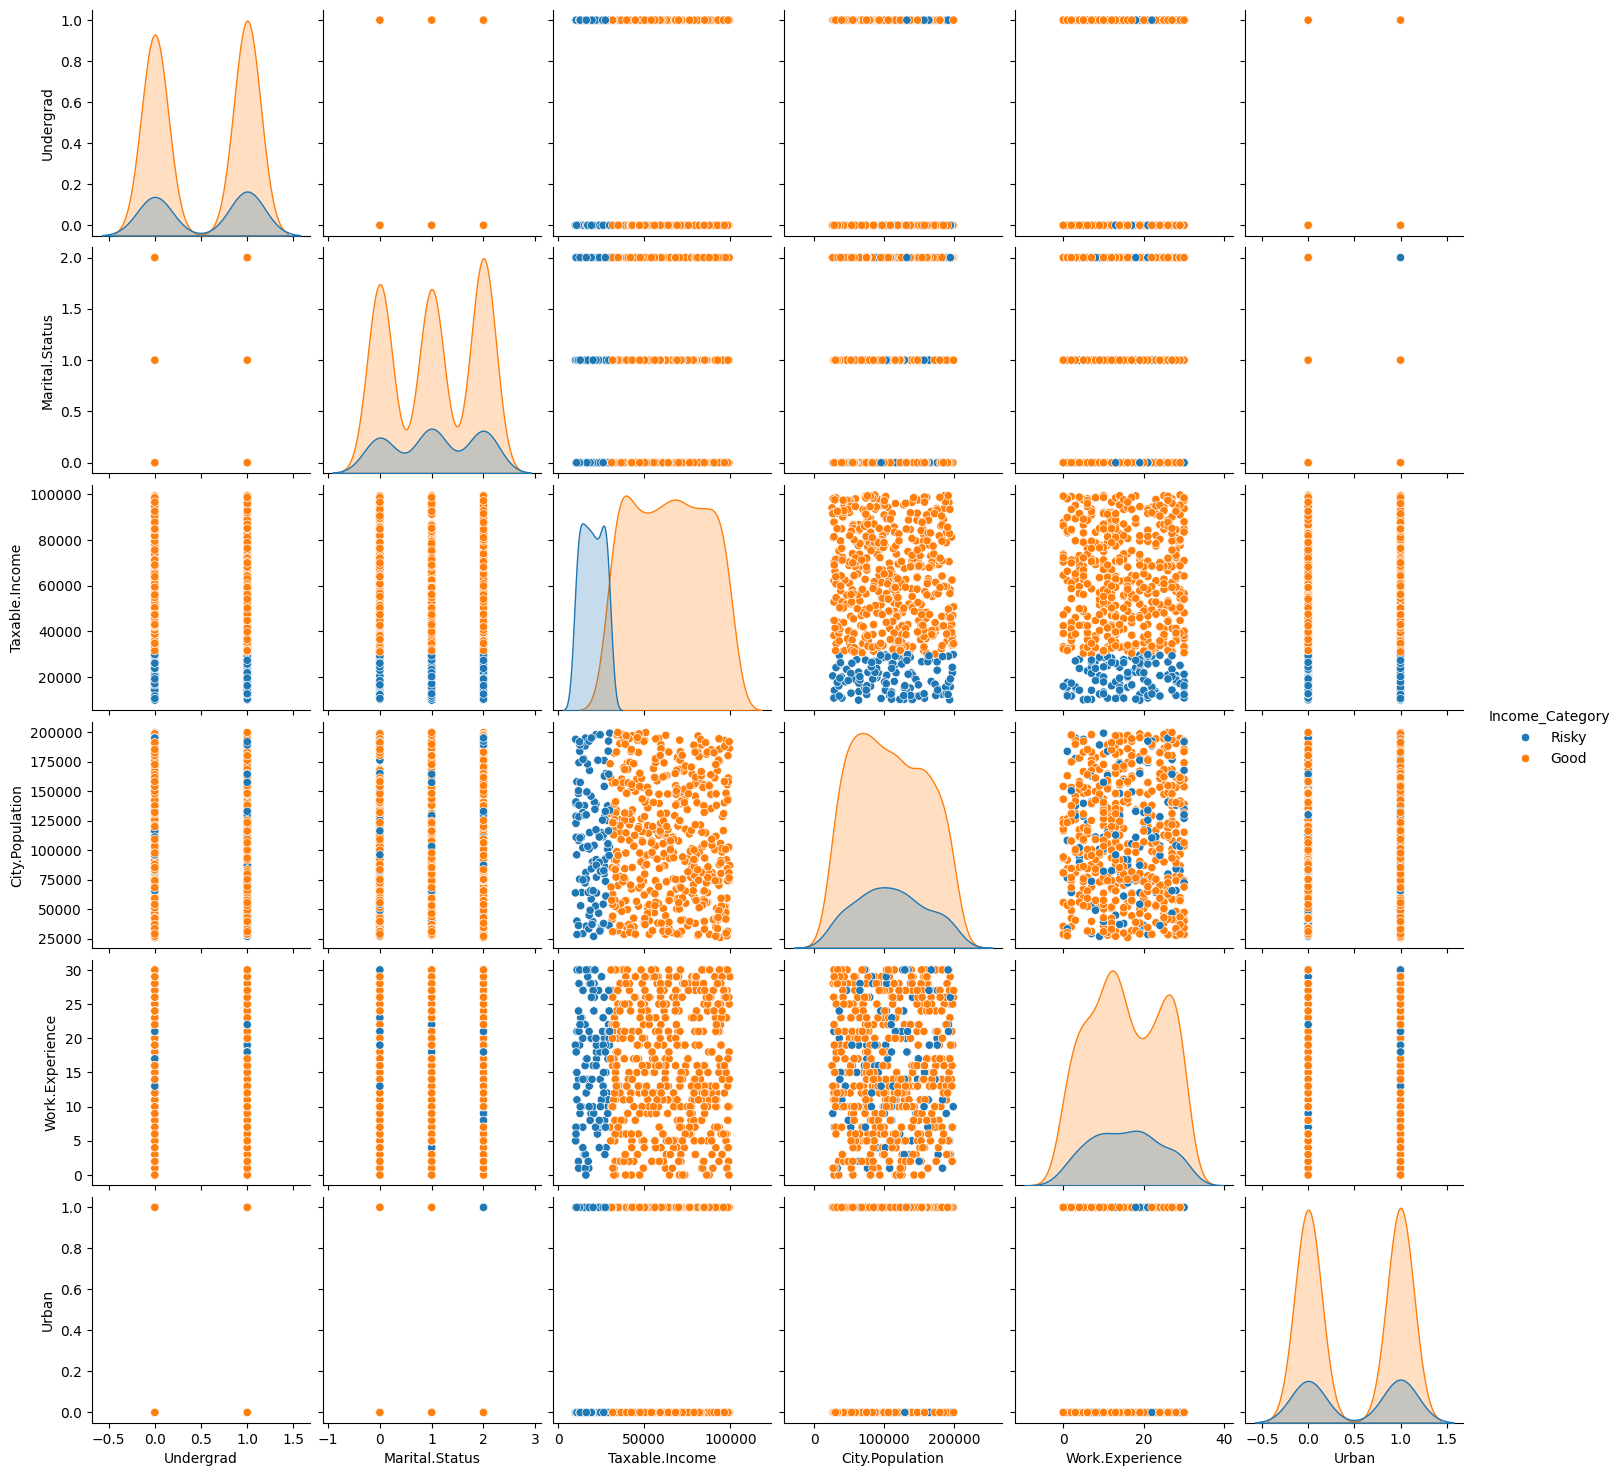

In [18]:
import seaborn as sns
sns.pairplot (fraud_data,hue='Income_Category')

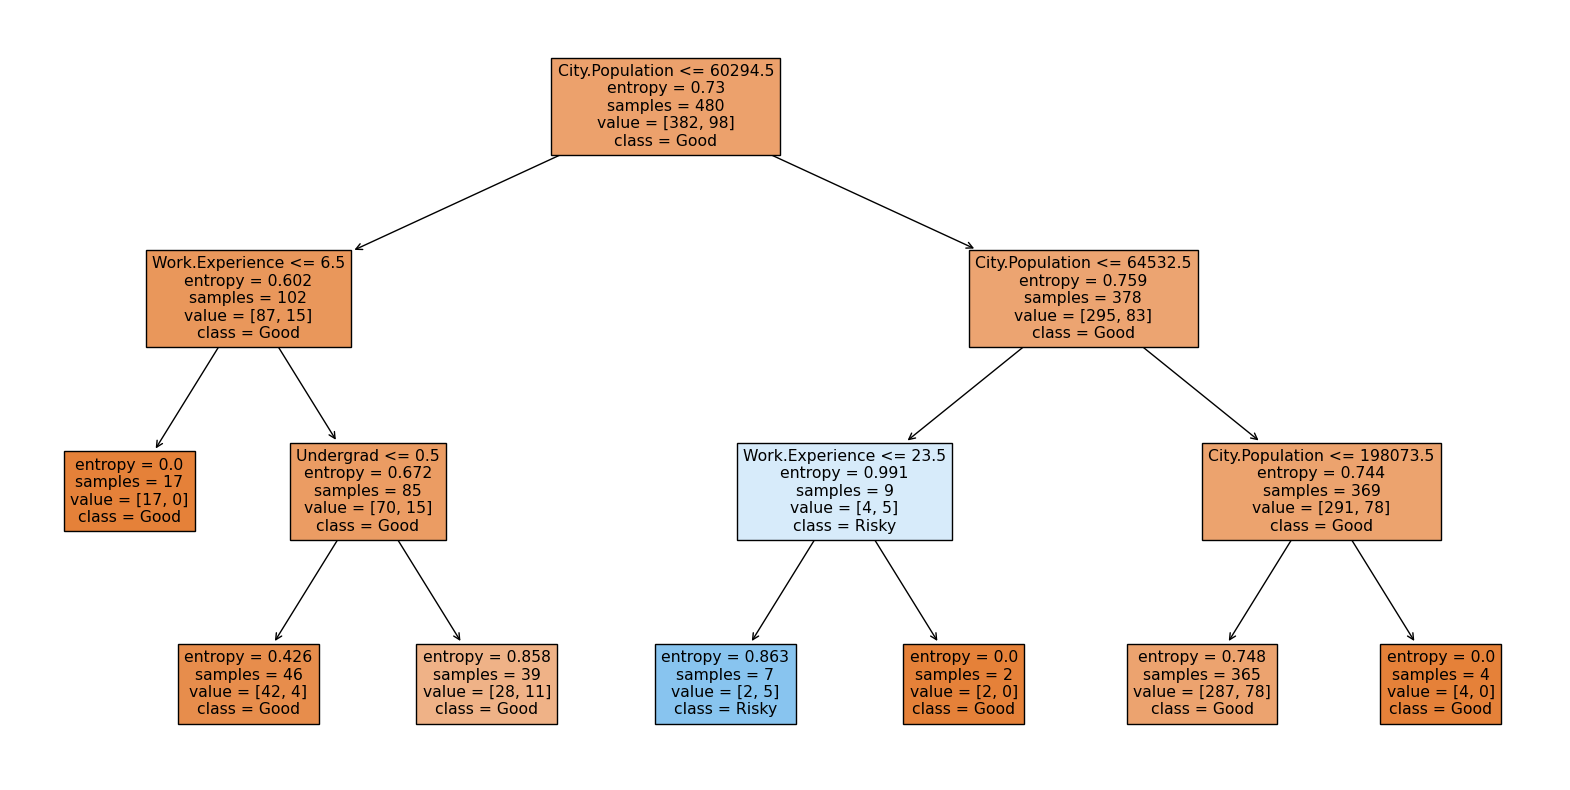

In [9]:
# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()
